In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics

In [2]:
df=pd.read_csv("tcs.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2015,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,02-01-2015,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,05-01-2015,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,06-01-2015,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,07-01-2015,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1666 non-null   object 
 1   Open       1663 non-null   float64
 2   High       1663 non-null   float64
 3   Low        1663 non-null   float64
 4   Close      1663 non-null   float64
 5   Adj Close  1663 non-null   float64
 6   Volume     1663 non-null   float64
dtypes: float64(6), object(1)
memory usage: 91.2+ KB


In [5]:
df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [6]:
df.fillna(0,inplace=True)

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1.666000e+03
mean,1822.739434,1841.918138,1802.373129,1821.939677,1730.117326,2.866134e+06
std,683.051810,690.147652,675.849203,682.780603,717.831032,2.752846e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1255.500000,1265.000000,1243.000000,1253.924988,1129.781647,1.731495e+06
50%,1724.000000,1749.000000,1699.674988,1721.099976,1618.729431,2.400639e+06
75%,2167.250000,2189.400086,2145.012574,2164.487488,2078.331482,3.324693e+06
max,3930.000000,3981.750000,3892.100098,3954.550049,3954.550049,8.806715e+07


In [9]:
df.shape

(1666, 7)

In [10]:
df1=df.reset_index()["Close"]
df1.shape

(1666,)

In [11]:
df1

0       1272.775024
1       1289.724976
2       1270.125000
3       1223.300049
4       1208.849976
           ...     
1661    3871.300049
1662    3836.949951
1663    3779.149902
1664    3791.899902
1665    3775.550049
Name: Close, Length: 1666, dtype: float64

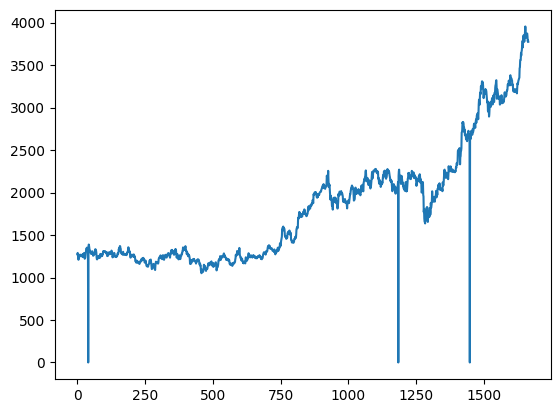

In [12]:
# Visualise the "Close" data 
plt.plot(df1)

In [13]:
# We use LSTM Model and it is very sensitive to scale the data
# so we use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
                

In [15]:
scaler

MinMaxScaler()

In [16]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(1666, 1)

In [18]:
print(df1)

[[0.32185078]
 [0.32613697]
 [0.32118066]
 ...
 [0.95564599]
 [0.95887013]
 [0.95473568]]


In [19]:
# Spliting the data set into train and test
training_size=int(len(df1)*0.65) 
testing_size=len(df1)-training_size

# Size of Both Data sets
training_size,testing_size

train_data,test_data=df1[0:training_size:],df1[training_size::]

In [20]:
training_size

1082

In [21]:
testing_size

584

In [22]:
# Convert an array of value into a dataset matrix
def create_dataset(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [23]:
# Reshape into x=t,t+1,t+2,t+3 and y=t+4
time_step=100

x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [24]:
print(x_train)

[[0.32185078 0.32613697 0.32118066 ... 0.32985423 0.33066341 0.3299364 ]
 [0.32613697 0.32118066 0.30933988 ... 0.33066341 0.3299364  0.33003755]
 [0.32118066 0.30933988 0.30568585 ... 0.3299364  0.33003755 0.3309795 ]
 ...
 [0.50267412 0.49776837 0.49412702 ... 0.52987062 0.53324651 0.52988328]
 [0.49776837 0.49412702 0.47939716 ... 0.53324651 0.52988328 0.54214763]
 [0.49412702 0.47939716 0.48513737 ... 0.52988328 0.54214763 0.53349938]]


In [25]:
x_test.shape,y_test.shape

((483, 100), (483,))

In [26]:
# Reshape the input to be [samples,time_steps,features] which is required for LSTM

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
x_train[:100]

array([[[0.32185078],
        [0.32613697],
        [0.32118066],
        ...,
        [0.32985423],
        [0.33066341],
        [0.3299364 ]],

       [[0.32613697],
        [0.32118066],
        [0.30933988],
        ...,
        [0.33066341],
        [0.3299364 ],
        [0.33003755]],

       [[0.32118066],
        [0.30933988],
        [0.30568585],
        ...,
        [0.3299364 ],
        [0.33003755],
        [0.3309795 ]],

       ...,

       [[0.32985423],
        [0.33066341],
        [0.3299364 ],
        ...,
        [0.32855192],
        [0.31403066],
        [0.31201401]],

       [[0.33066341],
        [0.3299364 ],
        [0.33003755],
        ...,
        [0.31403066],
        [0.31201401],
        [0.31255136]],

       [[0.3299364 ],
        [0.33003755],
        [0.3309795 ],
        ...,
        [0.31201401],
        [0.31255136],
        [0.31466917]]])

In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 30s 720ms/step - loss: 0.0276 - val_loss: 0.0609
Epoch 2/100
16/16 [==============================] - 6s 379ms/step - loss: 0.0026 - val_loss: 0.0300
Epoch 3/100
16/16 [==============================] - 5s 333ms/step - loss: 0.0015 - val_loss: 0.0176
Epoch 4/100
16/16 [==============================] - 5s 326ms/step - loss: 9.7167e-04 - val_loss: 0.0102
Epoch 5/100
16/16 [==============================] - 5s 327ms/step - loss: 6.2463e-04 - val_loss: 0.0073
Epoch 6/100
16/16 [==============================] - 5s 328ms/step - loss: 3.8989e-04 - val_loss: 0.0040
Epoch 7/100
16/16 [==============================] - 5s 325ms/step - loss: 2.8241e-04 - val_loss: 0.0027
Epoch 8/100
16/16 [==============================] - 5s 317ms/step - loss: 2.5382e-04 - val_loss: 0.0027
Epoch 9/100
16/16 [==============================] - 5s 322ms/step - loss: 2.6281e-04 - val_loss: 0.0027
Epoch 10/100
16/16 [==============================] - 5s 320ms/ste

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.12.0-rc1'

In [35]:
# Lets do the prediction and check the performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


16/16 [==============================] - 1s 66ms/step


In [36]:
# Transforming to original form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
# Calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1486.2226846104545

In [39]:
# Test DAta RSME
math.sqrt(mean_squared_error(y_test,test_predict))

2616.928530372964

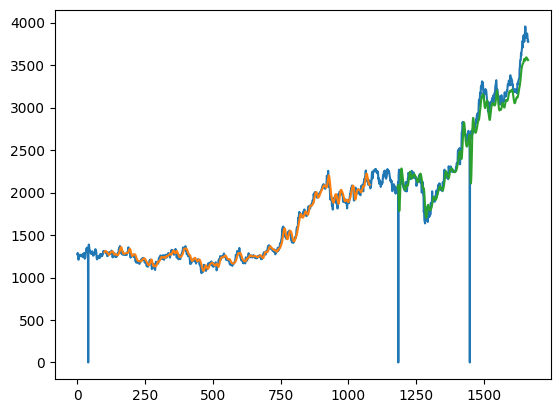

In [43]:
# Visualize the Data
# Plotting the Graph

# Shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

# Shift Test Prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

# PLot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Blue  - Actual
# Orange- Trained
# Green - Predicted

In [46]:
len(test_data)

584

In [56]:
x_input=test_data[484:].reshape(1,-1)
x_input.shape

(1, 100)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
# Demonstrate prediction for next 10 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {} ".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(" {} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)        
        

0 day input [0.78077153 0.77164278 0.77625772 0.78107497 0.77935542 0.7737922
 0.77897611 0.77922898 0.78744736 0.79870022 0.804137   0.79493243
 0.79886456 0.79730942 0.79135424 0.79433816 0.79497034 0.80494618
 0.80923237 0.80925768 0.81344275 0.82785652 0.82850136 0.82506226
 0.82799561 0.83897029 0.83379904 0.82767952 0.83478522 0.82472086
 0.85309329 0.85491396 0.84377488 0.84481169 0.84605074 0.84497603
 0.8409174  0.83979213 0.82494848 0.8281473  0.82398755 0.81125535
 0.80744966 0.8060462  0.81287378 0.80994043 0.80787953 0.80530024
 0.81066114 0.81332896 0.81244391 0.80857494 0.80488296 0.80863815
 0.80813241 0.80096342 0.81410018 0.83066338 0.82789443 0.83042316
 0.83695996 0.840222   0.84305417 0.84565878 0.84756798 0.87580126
 0.87821621 0.89847138 0.90036793 0.9001024  0.91980121 0.91368168
 0.92526329 0.92851274 0.94072647 0.93595984 0.95749198 0.93941154
 0.97021152 0.97155176 0.97406783 0.96493908 0.95438163 0.95874369
 0.97238625 0.98264021 1.         0.98704024 0.9679

 7 day output [[0.7401781]]
8 day input [0.78744736 0.79870022 0.804137   0.79493243 0.79886456 0.79730942
 0.79135424 0.79433816 0.79497034 0.80494618 0.80923237 0.80925768
 0.81344275 0.82785652 0.82850136 0.82506226 0.82799561 0.83897029
 0.83379904 0.82767952 0.83478522 0.82472086 0.85309329 0.85491396
 0.84377488 0.84481169 0.84605074 0.84497603 0.8409174  0.83979213
 0.82494848 0.8281473  0.82398755 0.81125535 0.80744966 0.8060462
 0.81287378 0.80994043 0.80787953 0.80530024 0.81066114 0.81332896
 0.81244391 0.80857494 0.80488296 0.80863815 0.80813241 0.80096342
 0.81410018 0.83066338 0.82789443 0.83042316 0.83695996 0.840222
 0.84305417 0.84565878 0.84756798 0.87580126 0.87821621 0.89847138
 0.90036793 0.9001024  0.91980121 0.91368168 0.92526329 0.92851274
 0.94072647 0.93595984 0.95749198 0.93941154 0.97021152 0.97155176
 0.97406783 0.96493908 0.95438163 0.95874369 0.97238625 0.98264021
 1.         0.98704024 0.96796097 0.96686095 0.97683678 0.97663447
 0.9784299  0.9789483  0.

 15 day output [[0.70508546]]
16 day input [0.79497034 0.80494618 0.80923237 0.80925768 0.81344275 0.82785652
 0.82850136 0.82506226 0.82799561 0.83897029 0.83379904 0.82767952
 0.83478522 0.82472086 0.85309329 0.85491396 0.84377488 0.84481169
 0.84605074 0.84497603 0.8409174  0.83979213 0.82494848 0.8281473
 0.82398755 0.81125535 0.80744966 0.8060462  0.81287378 0.80994043
 0.80787953 0.80530024 0.81066114 0.81332896 0.81244391 0.80857494
 0.80488296 0.80863815 0.80813241 0.80096342 0.81410018 0.83066338
 0.82789443 0.83042316 0.83695996 0.840222   0.84305417 0.84565878
 0.84756798 0.87580126 0.87821621 0.89847138 0.90036793 0.9001024
 0.91980121 0.91368168 0.92526329 0.92851274 0.94072647 0.93595984
 0.95749198 0.93941154 0.97021152 0.97155176 0.97406783 0.96493908
 0.95438163 0.95874369 0.97238625 0.98264021 1.         0.98704024
 0.96796097 0.96686095 0.97683678 0.97663447 0.9784299  0.9789483
 0.97026208 0.95564599 0.95887013 0.95473568 0.89308941 0.88365996
 0.86892176 0.85048836

 23 day output [[0.7539122]]
24 day input [0.82799561 0.83897029 0.83379904 0.82767952 0.83478522 0.82472086
 0.85309329 0.85491396 0.84377488 0.84481169 0.84605074 0.84497603
 0.8409174  0.83979213 0.82494848 0.8281473  0.82398755 0.81125535
 0.80744966 0.8060462  0.81287378 0.80994043 0.80787953 0.80530024
 0.81066114 0.81332896 0.81244391 0.80857494 0.80488296 0.80863815
 0.80813241 0.80096342 0.81410018 0.83066338 0.82789443 0.83042316
 0.83695996 0.840222   0.84305417 0.84565878 0.84756798 0.87580126
 0.87821621 0.89847138 0.90036793 0.9001024  0.91980121 0.91368168
 0.92526329 0.92851274 0.94072647 0.93595984 0.95749198 0.93941154
 0.97021152 0.97155176 0.97406783 0.96493908 0.95438163 0.95874369
 0.97238625 0.98264021 1.         0.98704024 0.96796097 0.96686095
 0.97683678 0.97663447 0.9784299  0.9789483  0.97026208 0.95564599
 0.95887013 0.95473568 0.89308941 0.88365996 0.86892176 0.85048836
 0.83016962 0.80948895 0.78955203 0.77108836 0.75454497 0.74017811
 0.72811627 0.718401

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [62]:
len(df1)

1666

In [63]:
df3=df1.tolist()
df3.extend(lst_output)

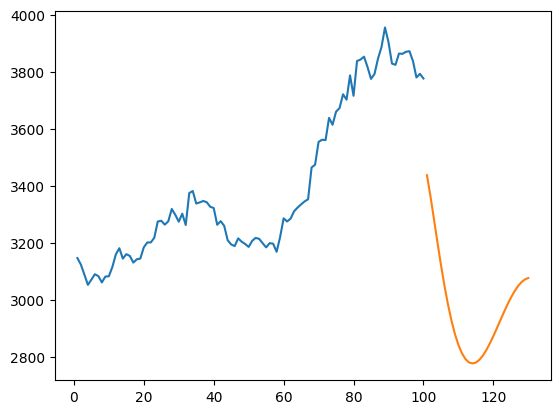

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[1566:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

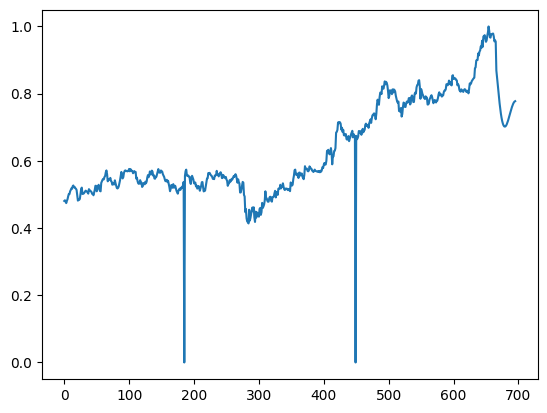

In [65]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

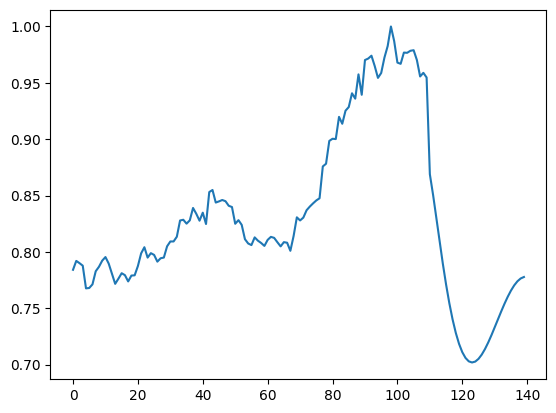

In [68]:
# Final Prediction graph of TCS 'Close' Stock Price
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1556:])